In [117]:
# Video de apoyo
# https://www.facebook.com/actuariospormexico/videos/356664756887728
# En este tutorial se eligen la cantidad de clusters usando el método del codo.

import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# manejo de errores y warnings
import warnings
warnings.filterwarnings('ignore')

sns.set(rc={'figure.figsize':(8,4)})

In [118]:
# Importo los datos de venta
df_original = pd.read_excel('BD/Online Retail.xlsx')

In [119]:
df_original.head(10)

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [120]:
# Hago una copia del DataFrame original
df = df_original.copy()
# Exploración del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   INVOICE_NO    541909 non-null  object        
 1   STOCK_CODE    541909 non-null  object        
 2   DESCRIPTION   540455 non-null  object        
 3   QUANTITY      541909 non-null  int64         
 4   INVOICE_DATE  541909 non-null  datetime64[ns]
 5   UNIT_PRICE    541909 non-null  float64       
 6   CUSTOMER_ID   406829 non-null  float64       
 7   REGION        541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [121]:
# Obtengo los clientes unicos
customer = pd.DataFrame(df.CUSTOMER_ID.unique())
customer.columns = ['CUSTOMER_ID']
customer.sample(5)

,CUSTOMER_ID
3875,18019.0
4028,15576.0
535,16596.0
793,15822.0
3317,14387.0


In [122]:
# Obtengo la última fecha de compra del cliente
max_purchase = df.groupby('CUSTOMER_ID')['INVOICE_DATE'].max().reset_index()
max_purchase.columns = ['CUSTOMER_ID', 'MAX_PURCHASE_DATE']
max_purchase.sample(5)

,CUSTOMER_ID,MAX_PURCHASE_DATE
3594,17226.0,2011-02-04 11:52:00
481,12963.0,2011-12-01 12:55:00
539,13046.0,2011-11-09 08:36:00
307,12719.0,2011-12-04 13:45:00
1887,14901.0,2011-11-28 17:09:00


## RECENCY
Tiempo que tiene la ultima compra del cliente a hoy, responde: Cuanto ha pasado desde la última compra.

In [123]:
# Calculo del Recency, resto los días de la última fecha de compra a la fecha más nueva del DF
max_purchase['RECENCY'] = (max_purchase.MAX_PURCHASE_DATE.max() - max_purchase.MAX_PURCHASE_DATE).dt.days

# Uno el dataframe de clientes únicos con el de fecha de compra
customer = pd.merge(customer, max_purchase, on='CUSTOMER_ID', how='inner' )
customer.sample(5)

,CUSTOMER_ID,MAX_PURCHASE_DATE,RECENCY
4330,17911.0,2011-11-30 14:52:00,8
2587,16320.0,2011-06-20 15:25:00,171
3420,16796.0,2011-09-11 14:01:00,88
1000,12530.0,2011-10-11 12:34:00,59
4032,13318.0,2011-12-08 18:51:00,0


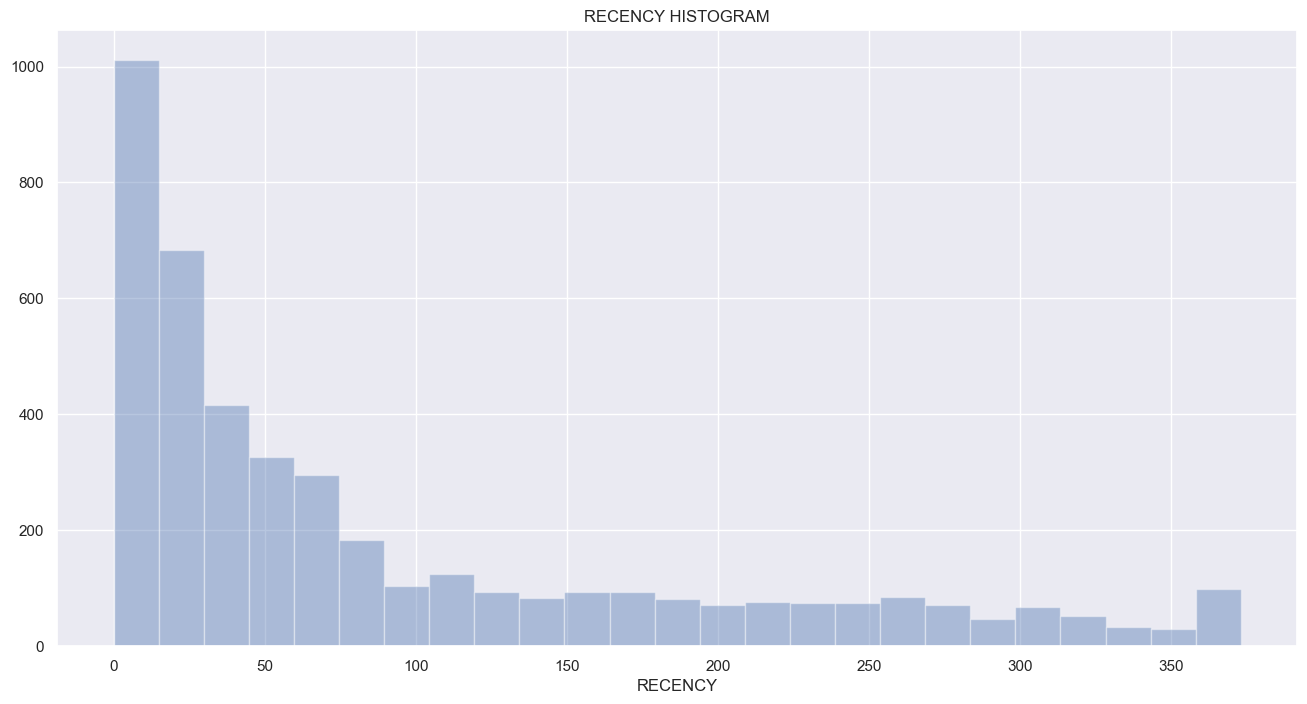

In [124]:
# Genero un histograma de Recency
f, ax = plt.subplots(figsize=(16,8))
sns.distplot(customer.RECENCY, kde=False)
ax.set_title('RECENCY HISTOGRAM')
plt.show()

In [125]:
# Estadística descriptiva de la variable RECENCY
customer.RECENCY.describe()

count    4372.000000
mean       91.047118
std       100.765435
min         0.000000
25%        16.000000
50%        49.000000
75%       142.000000
max       373.000000
Name: RECENCY, dtype: float64

## FRECUENCY
La cantidad de veces que el cliente ha realizado una compra, responde: Cuantas compras nos ha hecho el cliente.

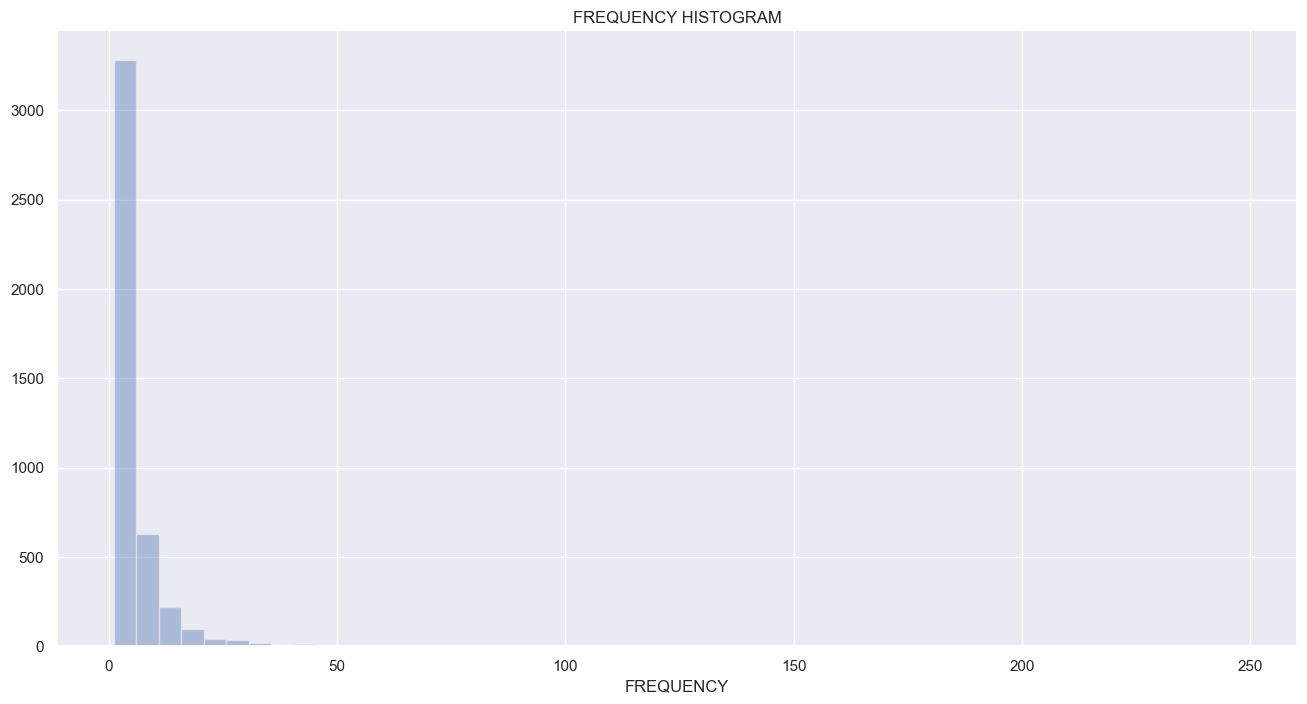

In [126]:
# Obtengo cantidad de compras del cliente
frequency = df.groupby('CUSTOMER_ID')['INVOICE_NO'].nunique().reset_index()
frequency.columns = ['CUSTOMER_ID', 'FREQUENCY']

# Uno el dataframe que acabo de crear con el de los clientes únicos
customer = pd.merge(customer, frequency, on='CUSTOMER_ID')

# Genero un histograma de Recency
f, ax = plt.subplots(figsize=(16,8))
sns.distplot(customer.FREQUENCY.where(lambda x: x < 3000), kde=False )
ax.set_title('FREQUENCY HISTOGRAM')
plt.show()

In [127]:
customer.FREQUENCY.describe()

count    4372.000000
mean        5.075480
std         9.338754
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       248.000000
Name: FREQUENCY, dtype: float64

## MONETARY
El monto que el cliente ha dejado a la empresa, responde: Cuanto dinero ha dejado el cliente a la empresa en un lapso de tiempo

In [128]:
# Calculo el monto total por cada compra
df['MONETARY'] = df.UNIT_PRICE * df.QUANTITY

# Obtengo el valor monetario de compra por cliente
monetary = df.groupby('CUSTOMER_ID')['MONETARY'].sum().reset_index()

# Uno el dataframe de monetary con el de clientes únicos
customer = pd.merge(customer, monetary, on='CUSTOMER_ID')

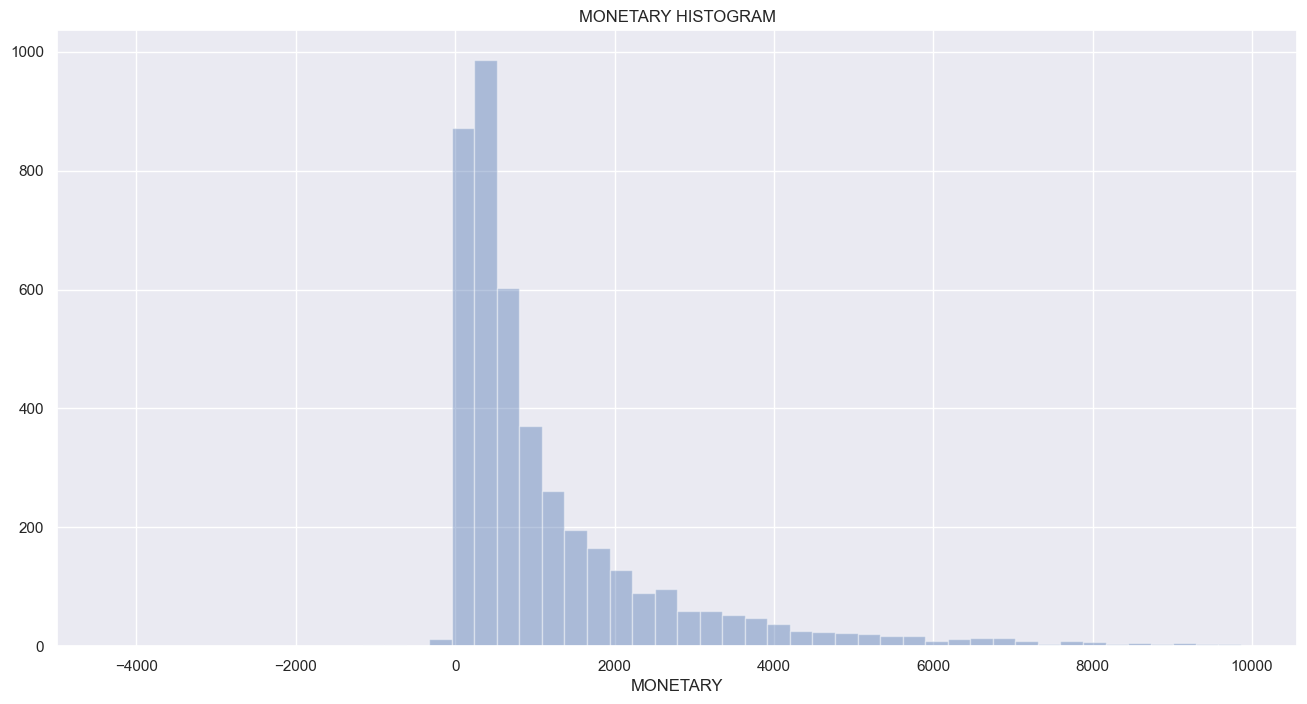

In [129]:
# Genero un histograma de Monetary
f, ax = plt.subplots(figsize=(16,8))
sns.distplot(customer.MONETARY.where(lambda x: x < 10000), kde=False )
ax.set_title('MONETARY HISTOGRAM')
plt.show()

In [130]:
# Estadística descriptiva de mi variable MONETARY
customer.MONETARY.describe()

count      4372.000000
mean       1898.459701
std        8219.345141
min       -4287.630000
25%         293.362500
50%         648.075000
75%        1611.725000
max      279489.020000
Name: MONETARY, dtype: float64

## Algoritmo K-Means
Luego de crear los indicadores principales de la metodología RFM. Paso al Machine Learning.  Para ello uso el algoritmo no supervisado K-Means

<img src='ilustracion-kmeans.png'>

In [131]:
# Función para ordenar los clusters
def order_cluster(cluster_field_name, target_field_name, df, ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name, ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df, df_new[[cluster_field_name, 'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name], axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

### ELBOW METHOD
Me sirve para poder calcular cuál es mi numero óptimo de clusters, y lo puedo ver revisando una gráfica de codo

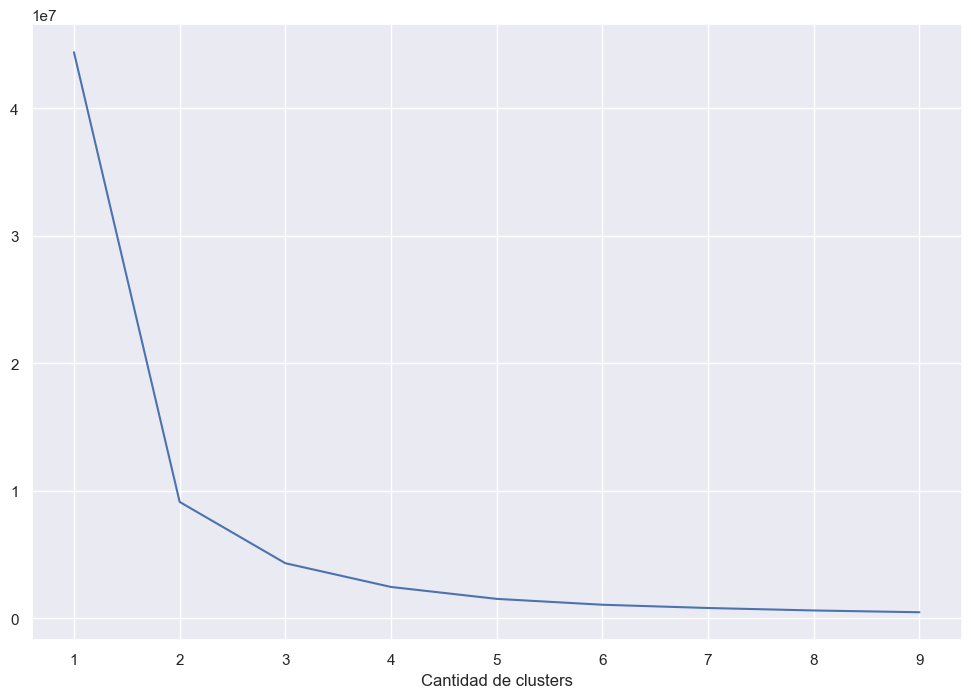

In [132]:
# configuración iniical tomo como referencia el indicador de RECENCY
sse={}
recency =  customer[['RECENCY']]

for k in range(1,10):
    # Instancia el algoritmo de k-means iterando sobre k
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    
    # Entreno el algoritmo
    kmeans.fit(recency)
    
    # Adjunto las etiquetas
    recency['clusters'] = kmeans.labels_
    
    # Adjunto la inercia o variación al arreglo sse
    sse[k] = kmeans.inertia_

# Grafico de codo (Elbow)
plt.figure(figsize=(12,8))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Cantidad de clusters')
plt.show()

In [136]:
# Instanciar el algoritmo con 4 clusters para Recency
kmeans = KMeans(n_clusters=4)

# Entreno el algoritmo
kmeans.fit(customer[['RECENCY']])

# Obtengo las predicciones
customer['RECENCY_CLUSTER'] = kmeans.predict(customer[['RECENCY']])

# Ordeno los clusters
customer = order_cluster('RECENCY_CLUSTER', 'RECENCY', customer, False)

# Estadística descriptiva del cluster creado
customer.groupby('RECENCY_CLUSTER')['RECENCY'].describe()

,count,mean,std,min,25%,50%,75%,max
RECENCY_CLUSTER,,,,,,,,
0,506.0,308.851779,39.144563,250.0,274.0,305.0,350.75,373.0
1,627.0,189.451356,32.948533,135.0,161.0,187.0,217.00,249.0
2,1072.0,79.278918,23.875838,49.0,59.0,73.0,95.00,134.0
3,2167.0,17.538533,13.320860,0.0,6.0,16.0,28.00,48.0


In [138]:
# Instancia del algoritmo con 4 clusters para Frequency
kmeans = KMeans(n_clusters=4)

# Entreno el algoritmo
kmeans.fit(customer[['FREQUENCY']])

# Obtengo las predicciones
customer['FREQUENCY_CLUSTER'] = kmeans.predict(customer[['FREQUENCY']])

# Ordeno los clusters
customer = order_cluster('FREQUENCY_CLUSTER', 'FREQUENCY', customer, True)

# Estadística descriptiva del cluster creado
customer.groupby('FREQUENCY_CLUSTER')['FREQUENCY'].describe()

,count,mean,std,min,25%,50%,75%,max
FREQUENCY_CLUSTER,,,,,,,,
0,3755.0,2.816511,1.976997,1.0,1.0,2.0,4.00,8.0
1,561.0,14.604278,5.615373,9.0,10.0,13.0,17.00,31.0
2,50.0,48.320000,14.876965,32.0,36.5,43.0,53.75,89.0
3,6.0,167.500000,56.807570,118.0,120.5,148.5,210.25,248.0


In [141]:
# Instancia del algoritmo con 4 clusters para Monetary
kmeans = KMeans(n_clusters=4)

# Entreno el algoritmo
kmeans.fit(customer[['MONETARY']])

# Obtengo las predicciones
customer['MONETARY_CLUSTER'] = kmeans.predict(customer[['MONETARY']])

# Ordeno los clusters
customer = order_cluster('MONETARY_CLUSTER', 'MONETARY', customer, True)

# Estadística descriptiva del cluster creado
customer.groupby('MONETARY_CLUSTER')['MONETARY'].describe()

,count,mean,std,min,25%,50%,75%,max
MONETARY_CLUSTER,,,,,,,,
0,4252.0,1160.746285,1403.441736,-4287.63,286.565,623.575,1476.0700,8257.04
1,102.0,15390.295980,7557.269118,8393.22,10192.235,12395.080,17460.8075,40340.78
2,15.0,71423.516000,28632.631870,50415.49,52287.280,57385.880,77008.7300,132572.62
3,3.0,241136.560000,47874.073443,187482.17,221960.330,256438.490,267963.7550,279489.02


## Score de Segmentación
El algoritmo K-means nos da una segmentación generalizada, pero podemos personalizarla aún más creando una métrica que asigne una calificación al valor del cluster.

In [151]:
# Dataframe como lo tengo original podría decirse
customer.sample(3)

,CUSTOMER_ID,MAX_PURCHASE_DATE,RECENCY,FREQUENCY,MONETARY,RECENCY_CLUSTER,FREQUENCY_CLUSTER,MONETARY_CLUSTER,SCORE
4051,12626.0,2011-11-16 16:06:00,22,13,6388.35,3,1,0,4
3420,14212.0,2011-09-11 12:45:00,89,1,1070.48,2,0,0,2
1574,17426.0,2011-12-05 16:12:00,3,7,5022.26,3,0,0,3


In [153]:
# Creo un Score sumando el valor de cada uno de los clusters
customer['SCORE'] = customer.RECENCY_CLUSTER + customer.FREQUENCY_CLUSTER + customer.MONETARY_CLUSTER

# Obtengo el promedio para cada una de las métricas de las calificaciones creadas (Score)
customer.groupby('SCORE')[['RECENCY','FREQUENCY', 'MONETARY']].mean()

,RECENCY,FREQUENCY,MONETARY
SCORE,,,
0,309.043738,1.427435,329.120239
1,189.821718,2.113452,521.307927
2,81.136496,2.799613,910.079208
3,21.246981,3.826087,1149.190055
4,12.784270,13.995506,3802.266472
5,8.771429,24.300000,12741.666286
6,3.741935,44.451613,25862.682581
7,5.545455,86.818182,55567.717273
8,1.666667,113.000000,162131.253333


In [170]:
# Hare una función que me servirá para saber si son clientes de bajo o alto valor

def segment(score):
    if ( 0 <= score <= 1):
        s = 'Low-Value'
    elif (2 <= score <= 4):
        s = 'Average'
    elif (5 <= score <= 6):
        s = 'Potential'
    elif (7 <= score <= 8):
        s = 'Hihg-Value'
    else:
        s = 'NA'
        
    return s

# Agrego una columna aplcando esta función al campo score
customer['SEGMENT'] = customer['SCORE'].map(lambda x: segment(x))

# Imprimo tabla final
customer.sample(5)

,CUSTOMER_ID,MAX_PURCHASE_DATE,RECENCY,FREQUENCY,MONETARY,RECENCY_CLUSTER,FREQUENCY_CLUSTER,MONETARY_CLUSTER,SCORE,SEGMENT
2406,13467.0,2011-11-29 10:01:00,10,2,1083.71,3,0,0,3,Average
3594,17647.0,2011-10-05 15:38:00,64,1,133.06,2,0,0,2,Average
324,15236.0,2011-02-14 10:52:00,298,1,321.05,0,0,0,0,Low-Value
3010,14934.0,2011-09-28 09:45:00,72,3,1888.84,2,0,0,2,Average
3751,15942.0,2011-07-29 09:01:00,133,1,337.44,2,0,0,2,Average


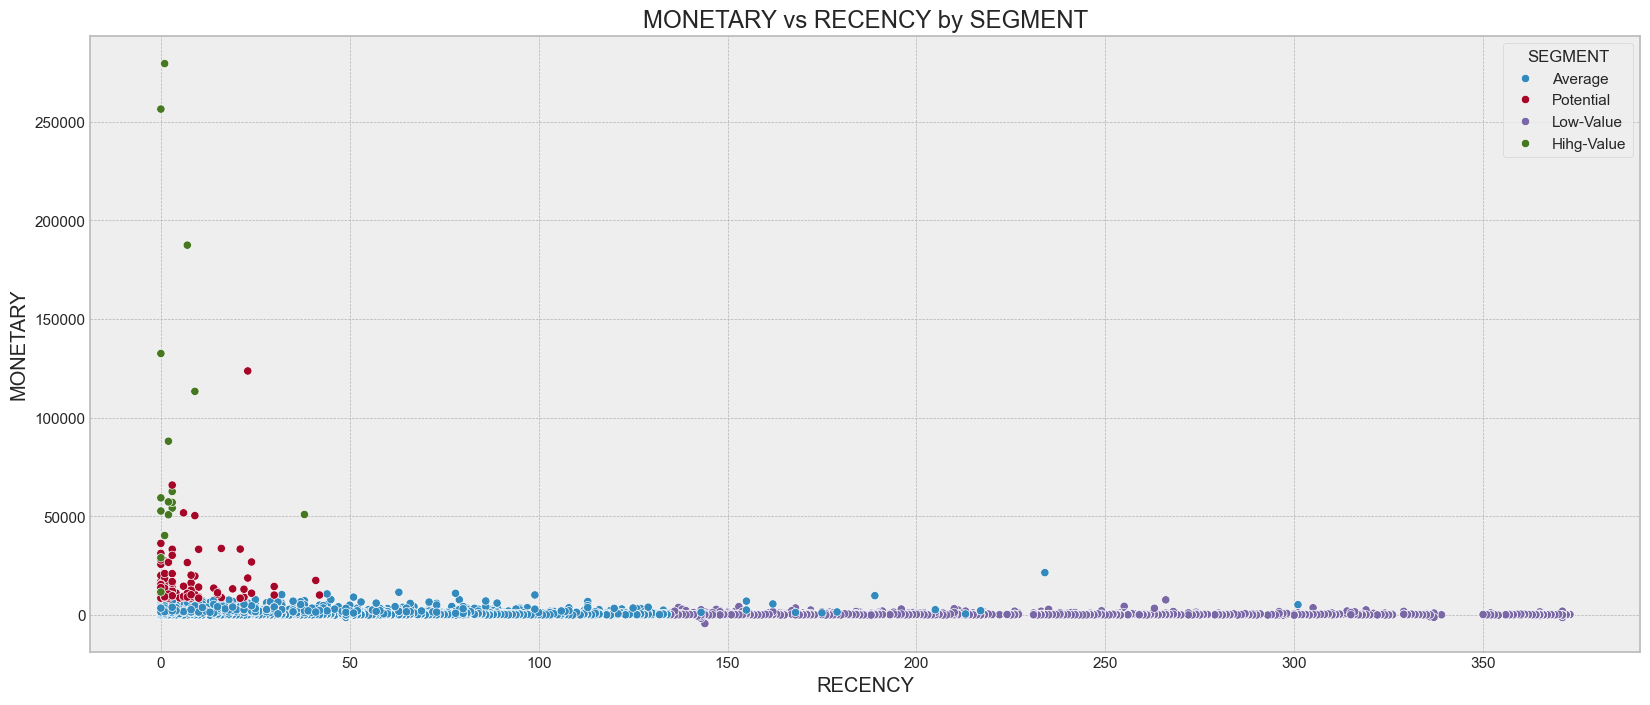

In [173]:
# Defino un estilo 'bmh'
plt.style.use('bmh')

# Filtro valores para RECENCY < 400
qry = customer.query('RECENCY < 400')

# Crea un gráfico de dispersión de 'MONETARY' VS 'RECENCY' por segmento
f, ax = plt.subplots(figsize=(20,8))
sns.scatterplot(data = qry,
                x = 'RECENCY',
                y = 'MONETARY',
                hue = 'SEGMENT')
ax.set_title('MONETARY vs RECENCY by SEGMENT')
plt.show()

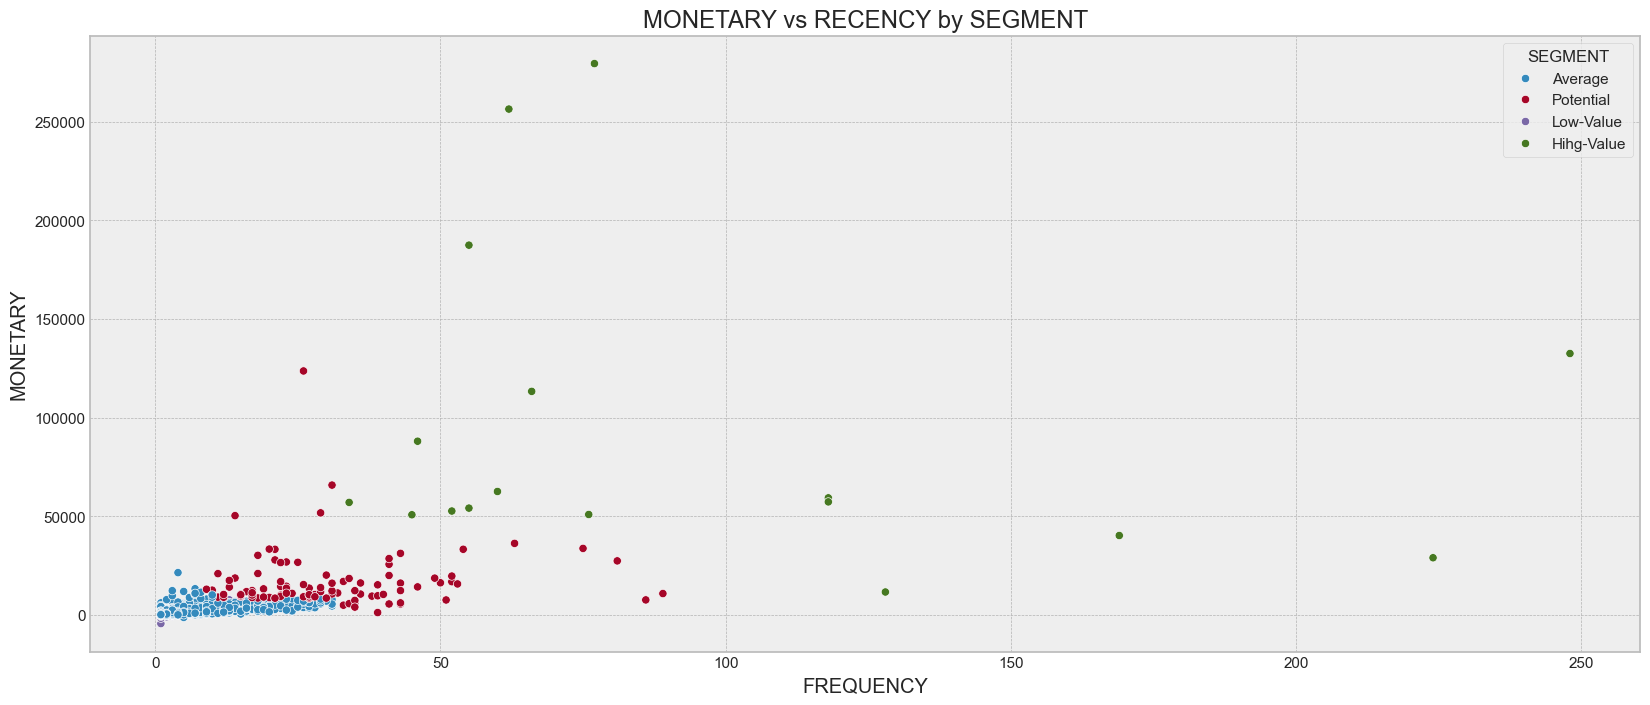

In [175]:
# Creo un gráfico de dispersión de 'MONETARY' VS 'FREQUENCY' VS POR SEGMENTO
f, ax = plt.subplots(figsize=(20,8))
sns.scatterplot(data = customer,
                x = 'FREQUENCY',
                y = 'MONETARY',
                hue = 'SEGMENT')
ax.set_title('MONETARY vs RECENCY by SEGMENT')
plt.show()